<a href="https://colab.research.google.com/github/shashwat12jha/Machine-Learning/blob/main/EarlyStop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [21]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

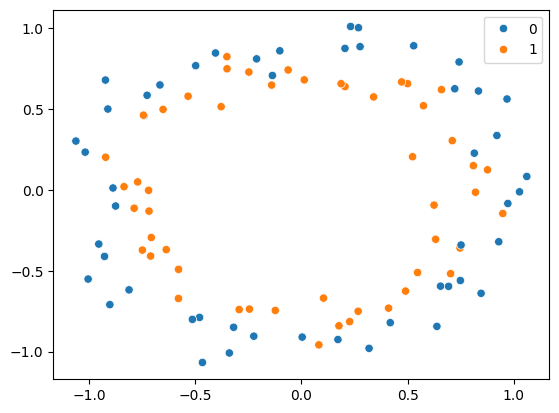

In [22]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [23]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [24]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
##model.add(Dense(64, input_dim=2, activation='relu'))
##model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=40,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [28]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.4922 - loss: 0.6979 - val_accuracy: 0.4500 - val_loss: 0.7017
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5188 - loss: 0.6955 - val_accuracy: 0.4500 - val_loss: 0.7028
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5094 - loss: 0.6890 - val_accuracy: 0.4000 - val_loss: 0.7045
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5406 - loss: 0.6927 - val_accuracy: 0.4000 - val_loss: 0.7045
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5703 - loss: 0.6893 - val_accuracy: 0.4000 - val_loss: 0.7059
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5367 - loss: 0.6910 - val_accuracy: 0.4000 - val_loss: 0.7075
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5430 - loss: 0.6906 - val_accuracy: 0.4000 - val_loss: 0.7095
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5664 - loss: 0.6884 - val_accuracy: 0.4000 - 

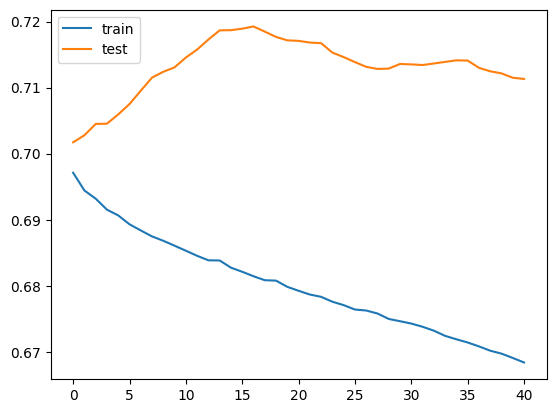

In [29]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


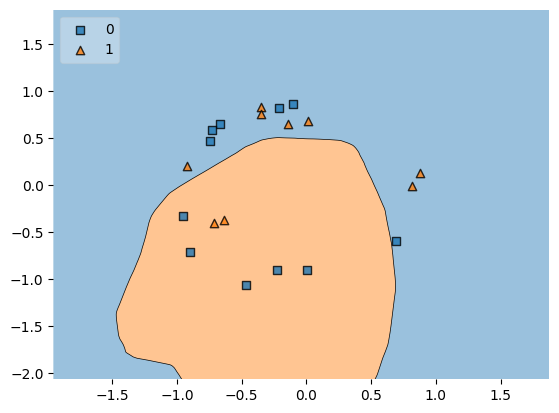

In [30]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

In [31]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5844 - loss: 0.6647 - val_accuracy: 0.4000 - val_loss: 0.7109
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5859 - loss: 0.6650 - val_accuracy: 0.4000 - val_loss: 0.7104
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5961 - loss: 0.6645 - val_accuracy: 0.4000 - val_loss: 0.7096
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.5766 - loss: 0.6628 - val_accuracy: 0.4000 - val_loss: 0.7096
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5469 - loss: 0.6703 - val_accuracy: 0.4000 - val_loss: 0.7093
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5492 - loss: 0.6654 - val_accuracy: 0.4000 - val_loss: 0.7100
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5828 - loss: 0.6640 - val_accuracy: 0.4000 - val_loss: 0.7114
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5594 - loss: 0.6655 - val_accuracy: 0.4000 - val_loss

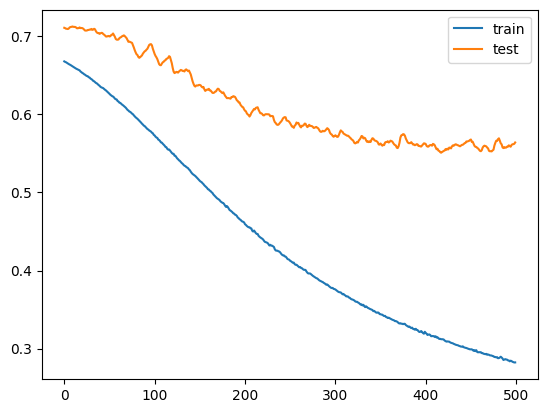

In [32]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


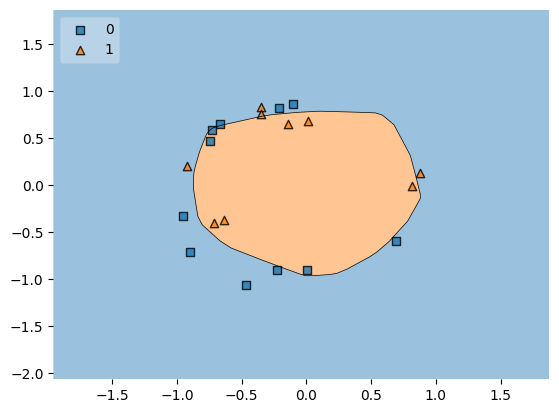

In [33]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()